In [82]:
# Bibliotheken
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt

# A1 b) LU-Zerlegung, relativer Fehler, Fehlerverstaerkungsfaktor

In [83]:
A = np.array([[8, -7, 2, 2], 
              [5, -2, 1, 0], 
              [2, -1, 1, 0], 
              [0, -2, 0, 1]], dtype=float)

b_not_exact = np.array([5, 4, 2, -1], dtype=float)
b_exact = np.array([5.03, 4.01, 2.02, -0.99], dtype=float)

# LU decomposition
P_T, L, U = sp.linalg.lu(A) # A = P_T @ L @ U
P = P_T.T # P = P_T_T

"""
LGS mit LU-Zerlegung loesen:

A @ x = b               <=>
P_T @ L @ U @ x = b     <=>
L @ U @ x = P @ b       <=>
L @ y = P @ b           <=>
U @ x = y               nach x aufloesen
"""

# solve A @ x = b_exact
y = sp.linalg.solve_triangular(L, P @ b_exact, lower=True) # L @ y = P @ b_exact nach y aufloesen
x_exact = sp.linalg.solve_triangular(U, y, lower=False) # U @ x_exact = y nach x_exact aufloesen
print(f"x_exact: {x_exact}")

# solve A @ x = b_not_exact
y = sp.linalg.solve_triangular(L, P @ b_not_exact, lower=True) # L @ y = P.T @ b_not_exact nach y aufloesen
x_not_exact = sp.linalg.solve_triangular(U, y, lower=False) # U @ x_not_exact = y nach x_not_exact aufloesen
print(f"x_not_exact: {x_not_exact}")

# Zaehler und Nenner fuer den relativen Fehler von x berechnen, resp. 1-norm von delta_x und 1-norm von x_exact
delta_x_norm = np.linalg.norm(x_exact - x_not_exact, ord=1) # 1-norm of delta_x
x_exact_norm = np.linalg.norm(x_exact, ord=1) # 1-norm of x_exact

# relativen Fehler von x berechnen
rel_error_x = delta_x_norm / x_exact_norm # relativer Fehler = delta_x_norm / x_exact_norm
print(f"relativer Fehler von x: {rel_error_x}")


# Verstaerkungsfaktor berechnen
"""
Verstaerkungsfaktor := relative Aenderung von x / relative Aenderung von b = rel_error_x / rel_error_b
"""

# dazu muessen wir zuerst den relativen Fehler von b berechnen
rel_error_b = np.linalg.norm(b_exact - b_not_exact, ord=1) / np.linalg.norm(b_exact, ord=1) # relativer Fehler von b
print(f"relativer Fehler von b: {rel_error_b}")

# Verstaerkungsfaktor berechnen
verstaerkungsfaktor = rel_error_x / rel_error_b
print(f"Verstaerkungsfaktor: {verstaerkungsfaktor}")

x_exact: [0.98 0.95 1.01 0.91]
x_not_exact: [1. 1. 1. 1.]
relativer Fehler von x: 0.044155844155842464
relativer Fehler von b: 0.0058091286307054
Verstaerkungsfaktor: 7.601113172541446


# A2 a) Lineare Ausgleichsrechnung, Cholesky-Zerlegung, QR-Zerlegung

In [84]:
#ueberbestimmtes LGS aufstellen
"""
ueberbestimmtes LGS: 
A @ alpha = u
"""

# gegeben aus Aufgabenstellung
t = np.array([0, 5, 10, 15, 20], dtype=float)
periode = 20.0
omega = 2 * np.pi / periode
u = np.array([-1.5, 1.5, 2.5, -0.5, -1.5]) # rechte Seite des LGS

# Matrix A aufstellen
A = np.zeros((5, 3), dtype=float)
for i in range(5):
    A[i, :] = np.array([1, np.cos(omega*t[i]), np.sin(omega*t[i])]) # Zeile i von A: [1, cos(t[i]), sin(t[i])]

print(f"A: \n{A}")
print(f"u: \n{u}")

A: 
[[ 1.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]
 [ 1.0000000e+00 -1.8369702e-16 -1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]]
u: 
[-1.5  1.5  2.5 -0.5 -1.5]


In [85]:
# Normalgleichung aufstellen

"""
Normalgleichung: 
A.T @ A @ alpha = A.T @ u
"""
print(f"A.T @ A: \n{A.T @ A}")
print(f"A.T @ u: \n{A.T @ u}")

A.T @ A: 
[[ 5.00000000e+00  1.00000000e+00 -2.28847549e-17]
 [ 1.00000000e+00  3.00000000e+00 -1.22464680e-16]
 [-2.28847549e-17 -1.22464680e-16  2.00000000e+00]]
A.T @ u: 
[ 0.5 -5.5  2. ]


Variante 1: Cholesky von A.T @ A

In [86]:
# Cholesky-Zerlegung von A.T @ A
C = sp.linalg.cholesky(A.T @ A, lower=True) # A.T @ A = C @ C^T
print(f"\nC: \n{C}")

# Normalgleichung mit Cholesky-Zerlegung loesen
"""
A.T @ A @ alpha = A.T @ u <=> 
C @ C.T @ alpha = A.T @ u

C @ y = A.T @ u nach y aufloesen 
C.T @ alpha = y nach alpha aufloesen
"""
y = sp.linalg.solve_triangular(C, A.T @ u, lower=True) # C @ y = A.T @ u nach y aufloesen
alpha = sp.linalg.solve_triangular(C.T, y, lower=False)  # C^T @ alpha = y nach alpha aufloesen
print(f"\nalpha: {alpha}")


C: 
[[ 2.23606798e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47213595e-01  1.67332005e+00  0.00000000e+00]
 [-1.02343735e-17 -7.04513932e-17  1.41421356e+00]]

alpha: [ 0.5 -2.   1. ]


Variante 2: (reduzierte) QR Zerlegung von A

In [87]:
# reduzierte (economic) QR-Zerlegung von A
Q, R = sp.linalg.qr(A, mode="economic") # A = Q @ R
print(f"\nQ:\n{Q}")
print(f"\nR:\n{R}")

# Normalgleichung mit reduzierter QR-Zerlegung loesen
alpha = sp.linalg.solve_triangular(R, Q.T @ u, lower=False) # R @ alpha = Q.T @ u nach alpha aufloesen
print(f"\nalpha: {alpha}")


Q:
[[-4.47213595e-01  4.78091444e-01 -2.35149010e-16]
 [-4.47213595e-01 -1.19522861e-01  7.07106781e-01]
 [-4.47213595e-01 -7.17137166e-01  3.15913018e-16]
 [-4.47213595e-01 -1.19522861e-01 -7.07106781e-01]
 [-4.47213595e-01  4.78091444e-01 -2.94709645e-16]]

R:
[[-2.23606798e+00 -4.47213595e-01  5.47678698e-17]
 [ 0.00000000e+00  1.67332005e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.41421356e+00]]

alpha: [ 0.5 -2.   1. ]


In [88]:
def create_phi(alpha, omega):

    def phi(t):
        return alpha[0] + alpha[1] * np.cos(omega * t) + alpha[2] * np.sin(omega * t)
    
    return phi

phi = create_phi(alpha, omega)

# evaluate phi at t = 0, 5, 10, 15, 20
print(f"phi bei Messzeitpunkten mit berechneten Parametern alpha: {phi(t)}")

phi bei Messzeitpunkten mit berechneten Parametern alpha: [-1.5  1.5  2.5 -0.5 -1.5]


# A2 b) kubisch periodischer Spline

In [89]:
# Funktion Praktikum 13
def cubic_periodic_spline(x_values, y_values):
    
    # (konstante) Schrittweite
    h = x_values[1] - x_values[0]

    # Anzahl der Stützstellen
    m = len(x_values)

    # rechte Seite des linearen Gleichungssystems für die Momente aufstellen
    b = (6/h**2) * (4*y_values[0:m-2] - 8*y_values[1:m-1] + 4*y_values[2:m])
    b[0] += (6/h**2) * ((y_values[m-1] - y_values[m-2]) -  (y_values[1] - y_values[0]))
    b[-1] +=  (6/h**2) * ((y_values[m-1] - y_values[m-2]) - (y_values[1] - y_values[0]))

    # Matrix A für das lineare Gleichungssystem aufstellen
    A = np.zeros((m-2, m-2))
    A[0, 0] = 15
    A[0, 1] = 4
    A[0, m-3] = -1
    for i in range(1, m-3): 
        A[i,i-1] = 4
        A[i,i] = 16
        A[i,i+1] = 4
    A[m-3, 0] = -1
    A[m-3, m-4] = 4
    A[m-3, m-3] = 15

    # Momentenvektor initialisieren
    M = np.zeros(m)

    # LGS lösen
    L = sp.linalg.cholesky(A, lower=True) # Cholesky-Zerlegung
    y = sp.linalg.solve_triangular(L, b, lower=True) # Vorwärtseinsetzen    
    M[1:m-1] = sp.linalg.solve_triangular(L.T, y, lower=False) # Rückwärtseinsetzen

    # periodische Randbedingungen auf die äussersten Momente anwenden
    M[0] = M[m-1] = 3/(2*h) * ( (y_values[1]-y_values[0])/h - (y_values[m-1]-y_values[m-2])/h - h/6*M[1] - h/6*M[m-2] )

    # Momentenvektor printen
    print(f"Momentenvektor:{M}")

    # kubische Spline-Funktion definieren
    def s(x):
        
        # falls x ein Skalar ist
        if np.isscalar(x):

            # entsprechendes Teilintervall für x finden
            i = 0
            while (i < m-2) and (x_values[i+1] < x): # erste Abbruchbedingung verhindert allfälligen Indexüberlauf bei ungültigem x
                i += 1

            # Berechne die Funktion s_i(x) -> in der folgenden Zeile steht die eigentliche Berechnung von s für das Teilintervall i
            y = (M[i] * (x_values[i+1] - x)**3 + M[i+1] * (x - x_values[i])**3) / (6*h) + ((y_values[i] - M[i]*h**2/6) * (x_values[i+1] - x) + (y_values[i+1] - M[i+1]*h**2/6) * (x - x_values[i])) / h
        
        # falls x ein Array ist, muss s() (rekursiv) für alle Elemente in x aufgerufen werden ("list comprehension")
        else:
            y = np.array([s(val) for val in x])  # s auf jedes Element von x anwenden
        
        return y 
    

    return s # die periodische Splinefunktion s() zurückgeben

# gegeben aus Aufgabenstellung
t = np.array([0, 5, 10, 15, 20], dtype=float)
u = np.array([-1.5, 1.5, 2.5, -0.5, -1.5])

# kubisch periodische Spline-Interpolation durchführen
s = cubic_periodic_spline(t, u) # Spline-Funktion berechnen

# Wert des Splines bei 12 berechnen
print(f"Wert des Splines bei t=12ms: s(12ms) = {s(12)}V")

Momentenvektor:[ 0.24 -0.12 -0.24  0.12  0.24]
Wert des Splines bei t=12ms: s(12ms) = 1.516V


# A2 c) Vergleich der Methoden

Maximale absolute Differenz zwischen den beiden Methoden: 
0.05895883927879009


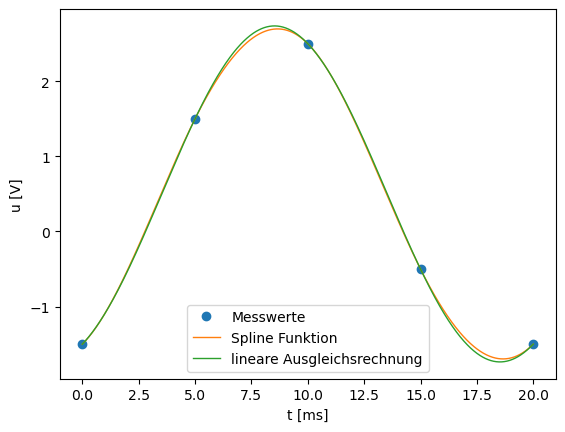

In [90]:
# Zeitvektor für die Berechnung des maximalen Unterschieds
k = np.linspace(0, 400, 401) # 401 Werte zwischen 0 und 400
t_test = k/400 * periode 

# maximale absolute Differenz zwischen den beiden Methoden
max_diff = np.max(np.abs(s(t_test) - phi(t_test)))

print(f"Maximale absolute Differenz zwischen den beiden Methoden: \n{max_diff}")

# Plot
t_new = np.linspace(t[0], t[-1], 1000)
u_spline = s(t_new)
u_ausgl = phi(t_new)
plt.plot(t, u, 'o', label="Messwerte")
plt.plot(t_new, u_spline, linewidth=1, label="Spline Funktion")
plt.plot(t_new, u_ausgl, linewidth=1, label="lineare Ausgleichsrechnung")
plt.xlabel("t [ms]")
plt.ylabel("u [V]")
plt.legend()
plt.show()

# A3 Finite-Differenzen-Methode

c) maximaler Fehler mit Schrittweite h=1/4

In [91]:
A = np.array([[-32, 17, 0], 
              [14, -32, 18], 
              [0, 13, -32]], dtype=float) # Matrix des LGS

b = np.array([-3*np.e**(-1/16), -6*np.e**(-1/4), -9*np.e**(-9/16)-57/np.e]) # rechte Seite des LGS

# LU decomposition
P_T, L, U = sp.linalg.lu(A) # A = P_T @ L @ U
P = P_T.T # P = P_T_T

print(f"P:\n{P}\nL:\n{L}\nU:\n{U}")

"""
LGS mit LU-Zerlegung loesen:

A @ x = b               <=>
P_T @ L @ U @ x = b     <=>
L @ U @ x = P @ b       <=>
L @ y = P @ b           wobei y = U @ x
U @ x = y               nach x aufloesen
"""

# solve A @ x = b
y = sp.linalg.solve_triangular(L, P @ b, lower=True) # L @ y = P @ b nach y aufloesen
x = sp.linalg.solve_triangular(U, y, lower=False) # U @ x = y nach x aufloesen

print(f"x:\n{x}")

# merge inner points and boundary points
y0 = 0
y4 = 3/np.e
y = np.array([y0, *x, y4])

# calculate maximum absolute error with t = 0, 0.25, 0.5, 0.75, 1
t = np.linspace(0, 1, 5)
y_analytical = 3*t*np.e**(-t**2)

# calculate maximum absolute error and print it

max_error = np.max(np.abs(y - y_analytical))
it = np.argmax(np.abs(y - y_analytical)) * 0.25
print(f"Maximaler absoluter Fehler: {max_error} bei t = {it}")

P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L:
[[ 1.          0.          0.        ]
 [-0.4375      1.          0.        ]
 [-0.         -0.52926209  1.        ]]
U:
[[-32.          17.           0.        ]
 [  0.         -24.5625      18.        ]
 [  0.           0.         -22.47328244]]
x:
[0.722042   1.1933591  1.30033881]
Maximaler absoluter Fehler: 0.02515792545844553 bei t = 0.5


# A4 skalare ODE

Verfahren für allgemeine s-stufige skalare ODE's in Standardform

In [92]:
"""
description:
    solves a first order ODE using a Runge-Kutta method specified by the Butcher tableau 

params:
    x0: start point of the interval
    xend: end point of the interval
    h: step size
    y0: initial value
    f: function f(x,y) = y'
    df: (diagonally) implicit methods require the derivative of f with respect to y (df(x,y)/dy), for explicit methods df is not needed and can (but doesn't have to) be set to None
    A: matrix of coefficients in Butcher tableau
    b: row vector at the bottom of Butcher tableau
    c: column vector at the left of Butcher tableau

returns:
    x: array of x values with step size h
    y: array of corresponding y values
"""
def RK(x0, xend, h, y0, f, df, A, b, c):
    x = [x0]
    y = [y0]

    s = len(c) # number of stages
    id = np.eye(s) # identity matrix of size s
    r = np.array([f(x[-1],y[-1])]*s) # initialize slopes



    # if method is explicit (ERK), we can sequentially compute the slopes in each stage:
    if np.allclose(A,np.tril(A, -1)):

        # loop over all time steps
        while x[-1] < xend-h/2:
            # loop over stages
            for i in range(s):
                r[i] = f(x[-1]+c[i]*h, y[-1]+h*(A[i,:i]@r[:i]))
            y.append(y[-1]+h*r@b)
            x.append(x[-1]+h)


    # if method is diagonally implicit (DIRK), we can sequentially compute the slopes in each stage using scalar Newton's method:
    elif np.allclose(A,np.tril(A)):

        # function for Newton's method
        def g(ri, xk, yk):
            res = ri - f(xk+c[i]*h, yk+h*(A[i,:i]@r[:i] + A[i,i]*ri))
            return res
        
        # derivative of g with respect to r
        def dg(ri, xk, yk):
            res = 1 - h*A[i,i]*df(xk+c[i]*h, yk+h*(A[i,:i]@r[:i] + A[i,i]*ri))
            return res

        # Newton's method for DIRK
        def newton_scalar(r, xk, yk, tol=1e-12, maxIter=20):
            k = 0
            delta = 10 * tol
            while np.abs(delta) > tol and k < maxIter:
                delta = g(r,xk,yk) / dg(r,xk,yk)
                r = r - delta
                k += 1
            return r
        
        # loop over all time steps
        while x[-1] < xend-h/2:
            # loop over stages
            for i in range(s):
                r[i] = newton_scalar(r[i], x[-1], y[-1]) # compute slope for stage i
            y.append(y[-1]+h*r@b)
            x.append(x[-1]+h)


    # if method is fully implicit (IRK), we need to solve a system of equations in each time step:
    else:
        
        # function for Newton's method
        def G(r, xk, yk):
            res = np.zeros(s) # residual vector 
            # loop over stages
            for i in range(s):
                res[i] = r[i] - f(xk+c[i]*h, yk+h*(A[i,:]@r)) # compute residual for stage i
            return res

        # Jacobian of G
        def DG(r, xk, yk):
            J = np.zeros((s,s)) # Jacobian matrix
            # loop over rows of J and A
            for i in range(s):
                df_val = df(xk+c[i]*h, yk+h*(A[i,:]@r))  # evaluate derivative of f once for each i
                # loop over columns of J and A
                for j in range(s):
                    J[i,j] = id[i,j] - h*A[i,j]*df_val
            return J

        
        # Newton's method for IRK
        def newton_vector(r, xk, yk, tol=1e-12, maxIter=20):
            k = 0
            delta = np.ones(s)*tol*10
            while np.linalg.norm(delta,np.inf) > tol and k < maxIter:
                J = DG(r,xk,yk)
                res = G(r,xk,yk)
                P_T,L,R = sp.linalg.lu(J)
                z = sp.linalg.solve_triangular(L,P_T.T@res,lower=True)
                delta = sp.linalg.solve_triangular(R,z,lower=False)
                r = r - delta
                k += 1
            return r
        
        # loop over all time steps
        while x[-1] < xend-h/2:
            r = newton_vector(r,x[-1],y[-1]) # slope to be used to compute y_{k+1}
            y.append(y[-1]+h*r@b)
            x.append(x[-1]+h)



    return np.array(x), np.array(y)

a) gDgl in Standardform bringen

In [93]:
# gDgl in Standardform
def f(x,y):
    return y - (1.0/y)*(0.5 + x)

# partielle Ableitung von f nach y
def df(x,y):
    return 1.0 + (1.0/(y**2.0))*(0.5 + x)

# Anfangspunkt
x0 = 0.0
y0 = 1.0

b) RK-Verfahren anhand Butcher-Tableau implementieren und Konvergenzordnung bestimmen

In [94]:
# Butcher tableau for Crouzeix's method
A = np.array([[0.5 + np.sqrt(3)/6, 0.0], [-np.sqrt(3)/3, 0.5 + np.sqrt(3)/6]])
b = np.array([0.5, 0.5])
c = np.array([0.5 + np.sqrt(3)/6, 0.5 - np.sqrt(3)/6])

# exact solution at x = 3
x_end = 3.0
y_end = 2.0


Ns = np.array([30.0, 300.0, 3000.0])

for N in Ns:
    h = (x_end - x0)/N
    x,y = RK(x0, x_end, h, y0, f, df, A, b, c)
    print(f"error at x = {x_end} with N = {N} steps: {abs(y[-1]-y_end)}")

error at x = 3.0 with N = 30.0 steps: 0.004510228202686317
error at x = 3.0 with N = 300.0 steps: 3.839440265274163e-06
error at x = 3.0 with N = 3000.0 steps: 3.782664848017703e-09


# A5 Systeme von ODE's

b) RK4, maximaler absoluter Fehler

In [95]:
"""
description:
    solves a system of first order ODEs using a Runge-Kutta method specified by the Butcher tableau
    
params:
    x0: start point of the interval
    xend: end point of the interval
    h: step size
    y0: initial value
    f: function f(x,y) = y'
    Df: implicit methods require the Jacobian of f with respect to y (df(x,y)/dy), for explicit methods Df is not needed and can (but doesn't have to) be set to None
    A: matrix of Butcher tableau
    b: row vector at the bottom of Butcher tableau
    c: left-hand side of Butcher tableau

returns:
    x: array of x values with step size h
    y: array of corresponding y values
"""
def RK_Sys(x0, xend, h, y0, f, Df, A, b, c):
    n = len(y0)
    
    x = [x0]
    y = [y0]

    s = len(c) # number of stages
    r = np.array([f(x[-1],y[-1])]*s) # initialize slopes



    # if method is explicit (ERK), we can sequentially compute the slopes in each stage:
    if np.allclose(A,np.tril(A, -1)):

        # loop over all time steps
        while x[-1] < xend-h/2:
            # loop over stages
            for i in range(s):
                r[i] = f(x[-1]+c[i]*h, y[-1]+h*(A[i,:i]@r[:i]))
            y.append(y[-1]+h*b@r)
            x.append(x[-1]+h)


    # if method is diagonally implicit (DIRK), we can sequentially compute the slopes in each stage using Newton's method for systems of n equations.
    elif np.allclose(A,np.tril(A)):

        # function for Newton's method
        def g(ri, xk, yk):
            return ri - f(xk+c[i]*h, yk+h*(A[i,:i]@r[:i] + A[i,i]*ri))
        
        # derivative of g with respect to r
        def Dg(ri, xk, yk):
            return np.identity(n) - h*A[i,i]*Df(xk+c[i]*h, yk+h*(A[i,:i]@r[:i] + A[i,i]*ri))

        # Newton's method for DIRK
        def newton_vector(r, xk, yk, tol=1e-12, maxIter=20):
            k = 0
            delta = np.ones(n)*tol*10
            while np.linalg.norm(delta,np.inf) > tol and k < maxIter:
                J = Dg(r,xk,yk)
                res = g(r,xk,yk)
                P_T,L,R = sp.linalg.lu(J)
                z = sp.linalg.solve_triangular(L,P_T.T@res,lower=True)
                delta = sp.linalg.solve_triangular(R,z,lower=False)
                r = r - delta
            return r
        
        # loop over all time steps
        while x[-1] < xend-h/2:
            # loop over stages
            for i in range(s):
                r[i] = newton_vector(r[i], x[-1], y[-1]) # compute slope for stage i
            y.append(y[-1]+h*b@r)
            x.append(x[-1]+h)


    # if method is fully implicit (IRK), we would need to solve s*n equations in each time step => not implemented
    else:
        
        print('IRK not implemented')



    return np.array(x), np.array(y)

In [96]:
def f(x,y):
    return np.array([
        y[1],
        y[1]**2 + 4.0*y[0]*(y[0]-2) + 2.0
    ])

N = 20
x_end = 2.0
x_0 = 0.0
h = (x_end-x_0)/N
y0 = np.array([1,0])

# Butcher tableau for the classical RK4 method
A_RK4 = np.array([[0.0, 0.0, 0.0, 0.0],
                [1/2, 0.0, 0.0, 0.0],
                [0.0, 1/2, 0.0, 0.0],
                [0.0, 0.0, 1.0, 0.0]], dtype=float)
b_RK4 = np.array([1/6, 1/3, 1/3, 1/6], dtype=float)
c_RK4 = np.array([0.0, 1/2, 1/2, 1.0], dtype=float)

x, y = RK_Sys(x_0, x_end, (x_end-x_0)/N, y0, f, None, A_RK4, b_RK4, c_RK4)

# analytical solution
y1_an = lambda x: np.cos(x)**2
y2_an = lambda x: 2*np.cos(x)*(-np.sin(x))

# calculate maximum absolute error
y1_err = np.max(np.abs(y[:,0] - y1_an(x)))
print(f"Maximaler Fehler von y1: {y1_err}")
y2_err = np.max(np.abs(y[:,1] - y2_an(x)))
print(f"Maximaler Fehler von y2: {y2_err}")

Maximaler Fehler von y1: 3.353665381830573e-05
Maximaler Fehler von y2: 5.644011859295972e-05


c) Jakobi berechnen

In [97]:
# variables
var_names = ['y1', 'y2']
vars = []
for var in var_names:
    exec(f"{var} = sym.symbols('{var}')")
    vars.append(eval(var))

# parameters
param_names = []
params = []
for param in param_names:
    exec(f"{param} = sym.symbols('{param}')")
    params.append(eval(param))

# components f1, f2, etc. of the vector-valued function (must be separated by a comma!)
f_components = [
    y2,
    y2**2 + 4*y1*(y1-2) + 2
]


# convert the list of sympy functions to a vector-valued sympy function
f_sym = sym.Matrix(f_components)

# calculate the Jacobian matrix of the function
Df_sym = f_sym.jacobian(vars)

# print the system of equations
print("vector-valued function:")
sym.pprint(f_sym)
print("Latex:\n$", sym.latex(f_sym), "$\n")

# print the Jacobian matrix
print("Jacobian of the function:")
sym.pprint(Df_sym)
print("Latex:\n$", sym.latex(Df_sym), "$\n")

vector-valued function:
⎡          y₂           ⎤
⎢                       ⎥
⎢                  2    ⎥
⎣4⋅y₁⋅(y₁ - 2) + y₂  + 2⎦
Latex:
$ \left[\begin{matrix}y_{2}\\4 y_{1} \left(y_{1} - 2\right) + y_{2}^{2} + 2\end{matrix}\right] $

Jacobian of the function:
⎡   0       1  ⎤
⎢              ⎥
⎣8⋅y₁ - 8  2⋅y₂⎦
Latex:
$ \left[\begin{matrix}0 & 1\\8 y_{1} - 8 & 2 y_{2}\end{matrix}\right] $



# A6 Nichtlineare Gleichungssyteme, Newton

b) Jakobi des Systems

In [98]:
# variables
var_names = ['x1', 'x2']
vars = []
for var in var_names:
    exec(f"{var} = sym.symbols('{var}')")
    vars.append(eval(var))

# parameters
param_names = ['a0', 'b0', 'c0', 'd0', 'K1', 'K2']
params = []
for param in param_names:
    exec(f"{param} = sym.symbols('{param}')")
    params.append(eval(param))

# components f1, f2, etc. of the vector-valued function (must be separated by a comma!)
f_components = [
    K1*(a0-x1-x2)*(b0-x1)-x1+x2-c0,
    K2*(a0-x1-x2)*(c0+x1-x2)-x2-d0
]



# convert the list of sympy functions to a vector-valued sympy function
f_sym = sym.Matrix(f_components)

# calculate the Jacobian matrix of the function
Df_sym = f_sym.jacobian(vars)

# print the Jacobian matrix
print("Latex:\n$", sym.latex(Df_sym), "$\n")

# Convert to numerical functions
f = sym.lambdify(vars+params, f_sym, 'numpy')
Df = sym.lambdify(vars+params, Df_sym, 'numpy')

# Wrap the lambdified functions to accept the variables and parameters as two separate arguments
f_wrapped = lambda x, a: np.array(f(*x, *a)).ravel()
Df_wrapped = lambda x, a: np.array(Df(*x, *a))

Latex:
$ \left[\begin{matrix}- K_{1} \left(b_{0} - x_{1}\right) - K_{1} \left(a_{0} - x_{1} - x_{2}\right) - 1 & - K_{1} \left(b_{0} - x_{1}\right) + 1\\K_{2} \left(a_{0} - x_{1} - x_{2}\right) - K_{2} \left(c_{0} + x_{1} - x_{2}\right) & - K_{2} \left(a_{0} - x_{1} - x_{2}\right) - K_{2} \left(c_{0} + x_{1} - x_{2}\right) - 1\end{matrix}\right] $



c) Newtonverfahren für Systeme

In [99]:
# Newton's method for solving nonlinear systems
"""
Solve nonlinear system f(x)=0 by Newton's method.
J is the Jacobian of f. Both f and J must be functions of x.
At input, x holds the start value. 
The iteration continues until |f(x)| < tol or the max number of iterations is exceeded.
"""
def newton_solver(f, J, x, tol = 1e-10, max_iter = 100):
    for i in range(max_iter):
        if np.linalg.norm(f(x)) < tol:
            print('Found solution after',i,'iterations.')
            return x
        delta = np.linalg.solve(J(x), f(x))
        x = x - delta

    print('Exceeded maximum iterations. No solution found.')
    return None

In [100]:
# parameters
a0, b0, c0, d0, K1, K2 = 0.007, 0.003, 0.0, 0.0, 1.2e4, 7.0e4
a = np.array([a0, b0, c0, d0, K1, K2])

# if the parameters are known, the function and Jacobian can be simplified to accept only the variables as argument
f_wrapped_simple = lambda x: f_wrapped(x, a)
Df_wrapped_simple = lambda x: Df_wrapped(x, a)

x0 = np.array([0.0, 0.0])
x = newton_solver(f_wrapped_simple, Df_wrapped_simple, x0)
print(f"Solution: x = {x}")

Found solution after 7 iterations.
Solution: x = [0.00299679 0.00295644]


d) Lösungen in Formeln einsetzen

In [101]:
# Gleichgewichtskonzentrationen a, b, d, c der vier an der Reaktion beteiligten Stoffe berechnen
a = a0 - x[0] - x[1]
b = b0 - x[0]
c = c0 + x[0] - x[1]
d = d0 + x[1]

# convert to numpy array for better printing
conc = np.array([a, b, c, d])

print(f"Gleichgewichtskonzentrationen: \n{conc}")

Gleichgewichtskonzentrationen: 
[1.04677187e-03 3.21207555e-06 4.03477215e-05 2.95644020e-03]
